# Logistic Regression with GridSearchCV Tuning

In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# df = pd.read_csv("./Resources/insurance_claims.csv")
# # Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# # Drop the null rows
# df = df.dropna()
# df.head()

claims_param = pd.read_csv("./Resources/claims_accidents.csv")
# TEAM_CRASH copy/ML_starter_code_templates/claims_selected_features.csv

# Drop the null columns where all values are null
claims_param1 = claims_param.dropna(axis='columns', how='all')
# Drop the null rows
claims_param1.head()

,age,bodily_injuries,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,visibility,temperature,humidity,wind_speed
0,48,1,2004,5,1,71610,10.0,63.0,45.0,0.0
1,42,0,2007,8,1,5070,10.0,37.0,89.0,0.0
2,29,2,2007,7,3,34650,10.0,37.0,54.0,7.0
3,41,1,2014,5,1,63400,2.0,70.0,93.0,12.0
4,44,0,2009,20,1,6500,10.0,87.0,63.0,13.0


In [5]:
claims_param1.columns

Index(['age', 'bodily_injuries', 'auto_year', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'total_claim_amount', 'visibility',
       'temperature', 'humidity', 'wind_speed'],
      dtype='object')

# Select your features (columns)

In [7]:
# Set features for training & testing. This will also be used as your x values.
claims_trining_features = claims_param1[['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'visibility', 'temperature', 'humidity', 'wind_speed', 'auto_year']].dropna()
# DataFrame with new columns
print(claims_trining_features.columns)

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'visibility', 'temperature', 'humidity', 'wind_speed', 'auto_year'],
      dtype='object')


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X = claims_trining_features
y = claims_trining_features["auto_year"]
print(X.shape, y.shape)

(200, 8) (200,)


In [9]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)


# Train the Model



In [11]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_minmax, y_train)

training_score = model.score(X_train_minmax, y_train)
testing_score = model.score(X_test_minmax, y_test)

scores = cross_val_score(model, X_train_minmax, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.15
/Users/amusaadebayo/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [10]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.3333333333333333
Testing Data Score: 0.14


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................................C=0.001; total time=   0.0s
[CV 2/5] END ........................................C=0.001; total time=   0.0s
[CV 3/5] END ........................................C=0.001; total time=   0.0s
[CV 4/5] END ........................................C=0.001; total time=   0.0s
[CV 5/5] END ........................................C=0.001; total time=   0.0s
[CV 1/5] END .........................................C=0.01; total time=   0.0s
[CV 2/5] END .........................................C=0.01; total time=   0.0s
[CV 3/5] END .........................................C=0.01; total time=   0.0s
[CV 4/5] END .........................................C=0.01; total time=   0.0s
[CV 5/5] END .........................................C=0.01; total time=   0.0s
[CV 1/5] END ..........................................C=0.1; total time=   0.0s
[CV 2/5] END ....................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=3)

In [14]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.18666666666666665
{'C': 10}
LogisticRegression(C=10)


In [15]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_minmax)

In [16]:
print('Test Acc: %.3f' % grid.score(X_test_minmax, y_test))

Test Acc: 0.160


In [17]:
predictions = model.predict(X_test_minmax)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [2002 2006 2006 2011 2007 2000 2007 2006 2002 2006]
First 10 Actual labels: [2001, 1999, 2005, 2013, 2006, 1997, 2004, 2006, 2002, 2002]


In [18]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,2002,2001
1,2006,1999
2,2006,2005
3,2011,2013
4,2007,2006
5,2000,1997
6,2007,2004
7,2006,2006
8,2002,2002
9,2006,2002


In [19]:
results.head(10)

,Prediction,Actual
0,2002,2001
1,2006,1999
2,2006,2005
3,2011,2013
4,2007,2006
5,2000,1997
6,2007,2004
7,2006,2006
8,2002,2002
9,2006,2002


In [20]:
results.tail(10)

,Prediction,Actual
40,2011,2013
41,2007,2006
42,2006,2007
43,2001,2005
44,2000,1999
45,2011,2006
46,2015,2011
47,2014,2014
48,2011,2012
49,2003,2007


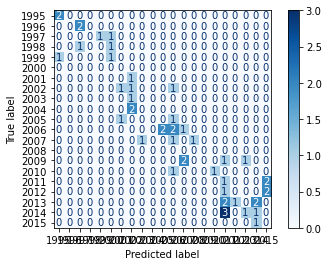

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [22]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

# Save the Model

In [23]:
# Saving model by updating "your_name" with Adebayo
# and "your_model" with model variable
# if joblib fails to import, run the command to install it in terminal
import joblib
filename = 'Adebayo_LogReg11.sav'
joblib.dump(model, filename)

['Adebayo_LogReg11.sav']